In [3]:
import geopandas as gpd
import os
import zipfile as zf
import geopandas
from shapely.geometry import shape
import gzip 
import urllib.request
import xarray as xr
import io
import shapefile
import pandas as pd
import json

In [82]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [84]:
import matplotlib

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.backend import square, mean

In [6]:
zp = zf.ZipFile('TM_WORLD_BORDERS-0.3.zip')
files_to_read = [y for y in zp.namelist() for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)]
dummy = zp.read(files_to_read[0])
dbf_file, prj_file, shp_file, shx_file = [zp.open(filename) for filename in files_to_read]
r = shapefile.Reader(shp = shp_file, shx = shx_file, dbf = dbf_file, encoding='windows-1252')
attributes, geometry = [], []
field_names = [field[0] for field in r.fields[1:]]
for row in r.shapeRecords():
    geometry.append(shape(row.shape.__geo_interface__))
    attributes.append(dict(zip(field_names, row.record)))

In [7]:
gdf = gpd.GeoDataFrame(data = attributes, geometry = geometry)

In [9]:
gdf

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...,...,...,...,...,...,...,...,...,...,...
241,TB,BL,BLM,652,Saint Barthelemy,0,0,19,29,-63.043,18.040,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
242,GK,GG,GGY,831,Guernsey,0,0,150,154,-2.576,49.459,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
243,JE,JE,JEY,832,Jersey,0,0,150,154,-2.129,49.219,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722..."
244,SX,GS,SGS,239,South Georgia South Sandwich Islands,0,0,0,0,-36.891,-54.209,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


Scraping does not work on my laptop now :

In [29]:
url = "https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz"
req2 = urllib.request.Request(url)
with gzip.open(urllib.request.urlopen(req2)) as resp2:
    xr_df2 = xr.open_dataset(io.BytesIO(resp2.read()))
df4 = xr_df2.to_dataframe()
dfnasa = df4.reset_index()

In [37]:
from datapackage import Package

package = Package('https://datahub.io/core/gdp-us/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

['validation_report', 'year_csv', 'quarter_csv', 'year_json', 'quarter_json', 'gdp-us_zip', 'year', 'quarter']
[[1930, Decimal('92.2'), Decimal('966.7'), Decimal('-16.0'), Decimal('-6.4')], [1931, Decimal('77.4'), Decimal('904.8'), Decimal('-23.1'), Decimal('-12.9')], [1932, Decimal('59.5'), Decimal('788.2'), Decimal('-4.0'), Decimal('-1.3')], [1933, Decimal('57.2'), Decimal('778.3'), Decimal('16.9'), Decimal('10.8')], [1934, Decimal('66.8'), Decimal('862.2'), Decimal('11.1'), Decimal('8.9')], [1935, Decimal('74.3'), Decimal('939.0'), Decimal('14.3'), Decimal('12.9')], [1936, Decimal('84.9'), Decimal('1060.5'), Decimal('9.6'), Decimal('5.1')], [1937, Decimal('93.0'), Decimal('1114.6'), Decimal('-6.1'), Decimal('-3.3')], [1938, Decimal('87.4'), Decimal('1077.7'), Decimal('7.0'), Decimal('8.0')], [1939, Decimal('93.5'), Decimal('1163.6'), Decimal('10.1'), Decimal('8.8')], [1940, Decimal('102.9'), Decimal('1266.1'), Decimal('25.7'), Decimal('17.7')], [1941, Decimal('129.4'), Decimal('1490

HERE STARTS: US dataset

In [62]:
df = pd.read_pickle("temperature_anomalies_1980_United States.pkl")

In [76]:
df1 = pd.read_csv("DF_US.zip")

In [18]:
df.sort_values(by=["time"])

,ISO2,ISO3,NAME,REGION,SUBREGION,LON,LAT,geometry,lat,lon,time,time_bnds,tempanomaly,YearMonth
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-79.0,37.0,1980-01-15,1980-02-01,0.14,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-87.0,41.0,1980-01-15,1980-01-01,0.78,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-71.0,45.0,1980-01-15,1980-02-01,0.37,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-89.0,35.0,1980-01-15,1980-02-01,0.78,1980-01
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-77.0,43.0,1980-01-15,1980-02-01,0.36,1980-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-89.0,37.0,2021-04-15,2021-04-01,-3.28,2021-04
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-89.0,39.0,2021-04-15,2021-05-01,-3.28,2021-04
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-77.0,37.0,2021-04-15,2021-04-01,-1.39,2021-04
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-87.0,35.0,2021-04-15,2021-04-01,-3.28,2021-04


In [71]:
df3 = df1.drop(["ISO2","ISO3","NAME","REGION","SUBREGION","Unnamed: 0","LON","LAT","index_right"], axis =1)

In [72]:
df3

,FIPS,UN,AREA,POP2005,lat,lon,nv,time,time_bnds,tempanomaly
0,US,840,915896,299846449,49.0,-95.0,0,2009-02-15,2009-02-01,1.04
1,US,840,915896,299846449,49.0,-95.0,0,2009-03-15,2009-03-01,0.06
2,US,840,915896,299846449,47.0,-87.0,1,2016-07-15,2016-08-01,1.21
3,US,840,915896,299846449,47.0,-87.0,1,2016-06-15,2016-07-01,0.85
4,US,840,915896,299846449,47.0,-87.0,1,2016-05-15,2016-06-01,0.98
...,...,...,...,...,...,...,...,...,...,...
130779,US,840,915896,299846449,33.0,-115.0,1,2012-11-15,2012-12-01,1.89
130780,US,840,915896,299846449,33.0,-115.0,1,2012-10-15,2012-11-01,1.34
130781,US,840,915896,299846449,33.0,-115.0,1,2012-09-15,2012-10-01,2.40
130782,US,840,915896,299846449,33.0,-115.0,1,2012-08-15,2012-09-01,2.06


Let's try a nn to predict heatwaves: Input signals tmeprature but also maybe umidity and stuff FOR ALL COUNTRY 

Import GDP US DATA: https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPC1&scale=left&cosd=1947-01-01&coed=2021-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-05-24&revision_date=2021-05-24&nd=1947-01-01

In [11]:
GDPus = pd.read_csv("GDPC1.csv")

In [20]:
# convert to period
GDPus['Month'] = pd.to_datetime(GDPus['DATE']).dt.to_period('M')
# set Date as index and resample
GDPus2 = GDPus.set_index('Month').resample('M').interpolate()
#Reset index
GDPus2 = GDPus2.reset_index()
#Create time variable
GDPus2['time'] = GDPus2['Month'].astype(str)
GDPus2['time'] = pd.to_datetime(GDPus2['time'])
#Drop unnecessary columns
GDPus2.drop(["Month", "DATE"], inplace= True, axis =1)

<AxesSubplot:>

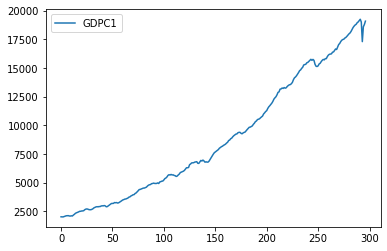

In [15]:
GDPus.plot()

Merge the 2 datasets

In [29]:
#Merging temperature anomalies with GDP data
mapping = dict(zip(GDPus2.time.dt.to_period('M'), GDPus2.GDPC1))
df = df.assign(gdp=df.time.dt.to_period('M').map(mapping))

In [30]:
df

,ISO2,ISO3,NAME,REGION,SUBREGION,LON,LAT,geometry,lat,lon,time,time_bnds,tempanomaly,YearMonth,gdp
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-79.0,37.0,1980-01-15,1980-02-01,0.14,1980-01,6837.641
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-85.0,43.0,1980-01-15,1980-01-01,0.78,1980-01,6837.641
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-71.0,43.0,1980-01-15,1980-01-01,0.43,1980-01,6837.641
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-75.0,41.0,1980-01-15,1980-01-01,0.39,1980-01,6837.641
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-85.0,31.0,1980-01-15,1980-01-01,0.78,1980-01,6837.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-83.0,37.0,2021-04-15,2021-04-01,-3.28,2021-04,NaN
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-81.0,39.0,2021-04-15,2021-05-01,-0.78,2021-04,NaN
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-79.0,43.0,2021-04-15,2021-05-01,-0.86,2021-04,NaN
208,US,USA,United States,19,21,-98.606,39.622,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",-87.0,43.0,2021-04-15,2021-05-01,-3.28,2021-04,NaN


lon     lat 
-165.0  61.0    AxesSubplot(0.125,0.125;0.775x0.755)
        65.0    AxesSubplot(0.125,0.125;0.775x0.755)
-163.0  61.0    AxesSubplot(0.125,0.125;0.775x0.755)
        63.0    AxesSubplot(0.125,0.125;0.775x0.755)
        65.0    AxesSubplot(0.125,0.125;0.775x0.755)
                                ...                 
-73.0   45.0    AxesSubplot(0.125,0.125;0.775x0.755)
-71.0   43.0    AxesSubplot(0.125,0.125;0.775x0.755)
        45.0    AxesSubplot(0.125,0.125;0.775x0.755)
-69.0   45.0    AxesSubplot(0.125,0.125;0.775x0.755)
        47.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tempanomaly, Length: 268, dtype: object

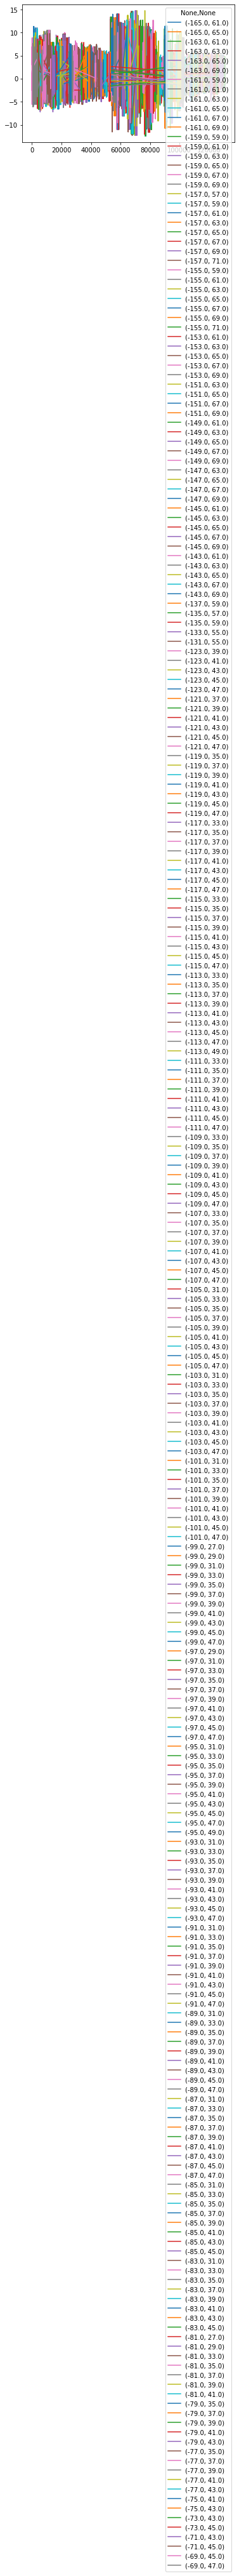

In [73]:
df3.groupby(["lon" , "lat"])['tempanomaly'].plot(legend='True')

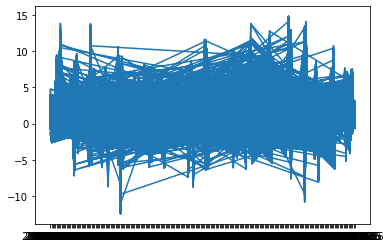

In [98]:
plt.plot(df3.time,df3.tempanomaly)
plt.show()

In [116]:
apple_fplot = df3.groupby(["lon" , "lat","time","tempanomaly"])["tempanomaly"].sum()
#plot_df = apple_fplot.unstack("time").loc[:, "tempanomaly"]
#plot_df.index = pd.PeriodIndex(plot_df.index.tolist(), freq='A')
#plot_df.plot(subplots=True)

In [111]:
apple_fplot

lon     lat   time        tempanomaly
-165.0  61.0  2001-01-15   6.820000      13.639999
              2001-02-15   8.059999      16.119998
              2001-03-15   0.690000       1.380000
              2001-04-15   3.060000       6.120000
              2001-05-15  -3.620000      -7.240000
                                           ...    
-69.0   47.0  2020-12-15   4.990000       9.980000
              2021-01-15   4.340000       8.679999
              2021-02-15   1.610000       3.220000
              2021-03-15   2.120000       4.240000
              2021-04-15   2.840000       5.680000
Name: tempanomaly, Length: 65390, dtype: float64

In [ ]:
plt.figure()
df3.groupby(["lon" , "lat","time","tempanomaly"]).sum().unstack().plot()